In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import torch

/opt/conda/envs/lab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Function to calculate the rotation angle
def get_rotation_angle(image):
    # Calculate image moments. 
    # Image moments help you to calculate some features like center of mass of the object, 
    # area of the object etc
    moments = cv2.moments(image)

    # Central moments, used for calculating the rotation angle
    mu20 = moments['mu20']
    mu02 = moments['mu02']
    mu11 = moments['mu11']

    # Calculate the angle of the least inertia
    # This angle can help understand the orientation of the object in the image
    theta = 0.5 * np.arctan2(2 * mu11, mu20 - mu02)

    # Convert the angle from radians to degrees
    theta = np.degrees(theta)

    return theta

# Function to rotate the image
def rotate_image(image, angle):
    # Get the center of the image
    image_center = tuple(np.array(image.shape[1::-1]) / 2)

    # Get the rotation matrix for rotating the image around its center
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

    # Perform the rotation
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

### Numpy Sum

In [4]:
file_list = glob.glob(os.path.join('target', '*.tif'))
rotate_time = []
width_time = []
for i in range(len(file_list)):
    # Load the image in grayscale mode
    image = cv2.imread(file_list[i], cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    
    start_time = time.perf_counter()
    # Calculate the rotation angle of the image
    angle = get_rotation_angle(image)

    # Rotate the image by the calculated angle plus 90 degrees
    rotated_image = rotate_image(image, angle+90)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    rotate_time.append(elapsed_time)

    # Calculate the sums along the x and y axis
    start_time = time.perf_counter()
    x_sum = np.count_nonzero(rotated_image, axis=0)
    y_sum = np.count_nonzero(rotated_image, axis=1)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    width_time.append(elapsed_time)

r_time = np.mean(rotate_time)
w_time = np.mean(width_time)
t_time = r_time + w_time

print(f"The avg time {r_time:.6f} seconds for rotate")
print(f"The avg time {w_time:.6f} seconds for width")
print(f"The avg time {t_time:.6f} seconds for width")


The avg time 0.000089 seconds for rotate
The avg time 0.000029 seconds for width
The avg time 0.000118 seconds for width


### Torch Sum

In [ ]:
file_list = glob.glob(os.path.join('target', '*.tif'))
rotate_time = []
width_time = []
for i in range(len(file_list)):
    # Load the image in grayscale mode
    image = cv2.imread(file_list[i], cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    
    start_time = time.perf_counter()
    # Calculate the rotation angle of the image
    angle = get_rotation_angle(image)

    # Rotate the image by the calculated angle plus 90 degrees
    rotated_image = rotate_image(image, angle+90)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    rotate_time.append(elapsed_time)

    # Calculate the sums along the x and y axis
    rotated_image = torch.tensor(rotated_image)
    start_time = time.perf_counter()
    count_255 = torch.sum(rotated_image == 255).item()

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    width_time.append(elapsed_time)

r_time = np.mean(rotate_time)
w_time = np.mean(width_time)
t_time = r_time + w_time

print(f"The avg time {r_time:.6f} seconds for rotate")
print(f"The avg time {w_time:.6f} seconds for width")
print(f"The avg time {t_time:.6f} seconds for width")


### Torch Unique

In [ ]:
file_list = glob.glob(os.path.join('target', '*.tif'))
rotate_time = []
width_time = []
for i in range(len(file_list)):
    # Load the image in grayscale mode
    image = cv2.imread(file_list[i], cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    
    start_time = time.perf_counter()
    # Calculate the rotation angle of the image
    angle = get_rotation_angle(image)

    # Rotate the image by the calculated angle plus 90 degrees
    rotated_image = rotate_image(image, angle+90)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    rotate_time.append(elapsed_time)

    # Calculate the sums along the x and y axis
    rotated_image = torch.tensor(rotated_image)
    start_time = time.perf_counter()
    unique_values, counts = torch.unique(rotated_image, return_counts=True)
    index_255 = (unique_values == 255).nonzero()[0]

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    width_time.append(elapsed_time)

r_time = np.mean(rotate_time)
w_time = np.mean(width_time)
t_time = r_time + w_time

print(f"The avg time {r_time:.6f} seconds for rotate")
print(f"The avg time {w_time:.6f} seconds for width")
print(f"The avg time {t_time:.6f} seconds for width")


### Plot

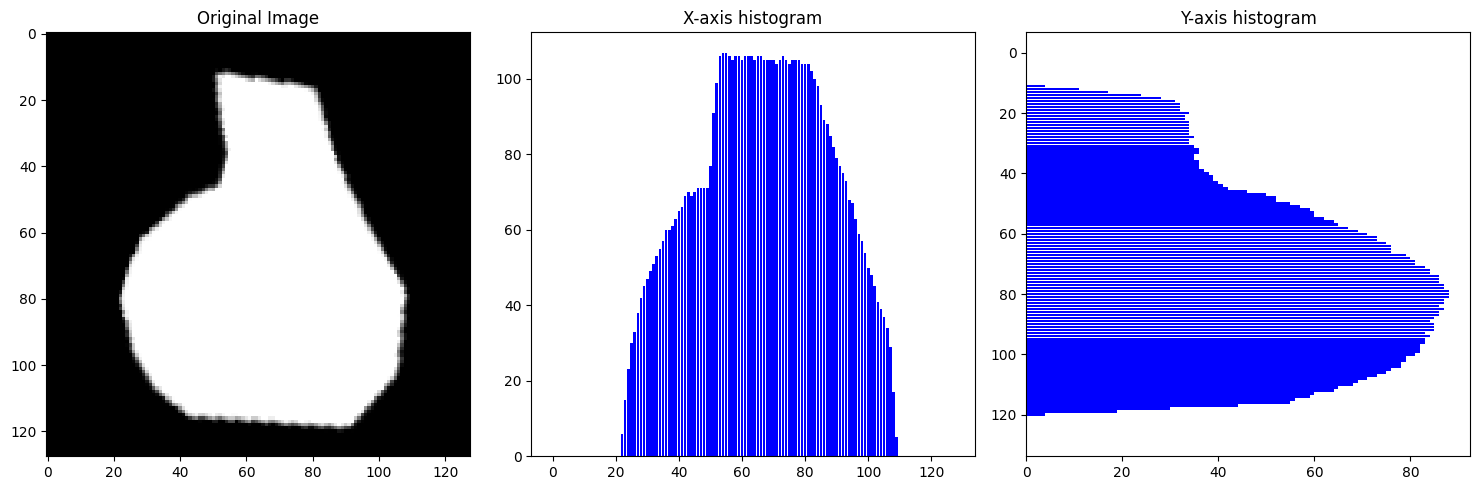

In [5]:
# Calculate the sums along the x and y axis
x_sum = np.count_nonzero(rotated_image, axis=0)
y_sum = np.count_nonzero(rotated_image, axis=1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Show the original image
axs[0].imshow(rotated_image, cmap='gray')
axs[0].set_title('Original Image')

# Plot x-axis histogram
axs[1].bar(range(len(x_sum)), x_sum, color='blue')
axs[1].set_title('X-axis histogram')

# Plot y-axis histogram, but invert the y-axis to match the image orientation
axs[2].barh(range(len(y_sum)), y_sum, color='blue')
axs[2].invert_yaxis()
axs[2].set_title('Y-axis histogram')

# Show the plots
plt.tight_layout()
plt.show()

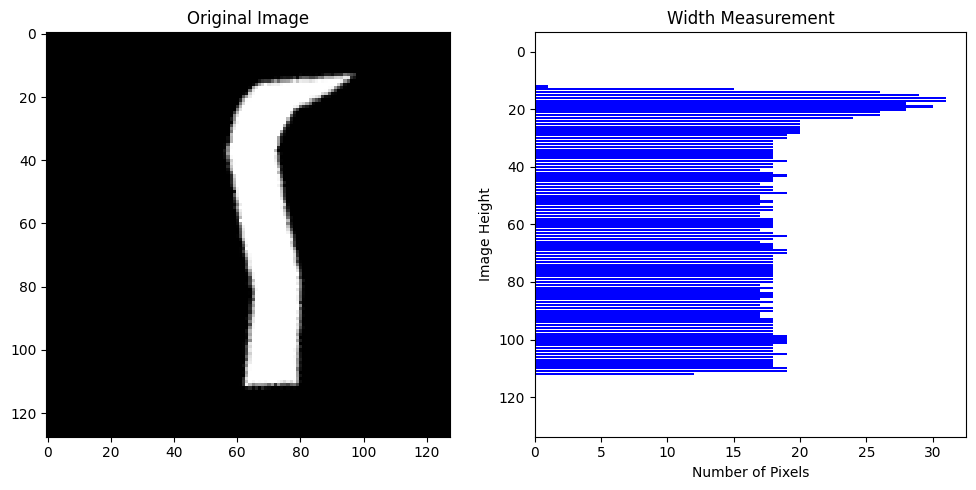

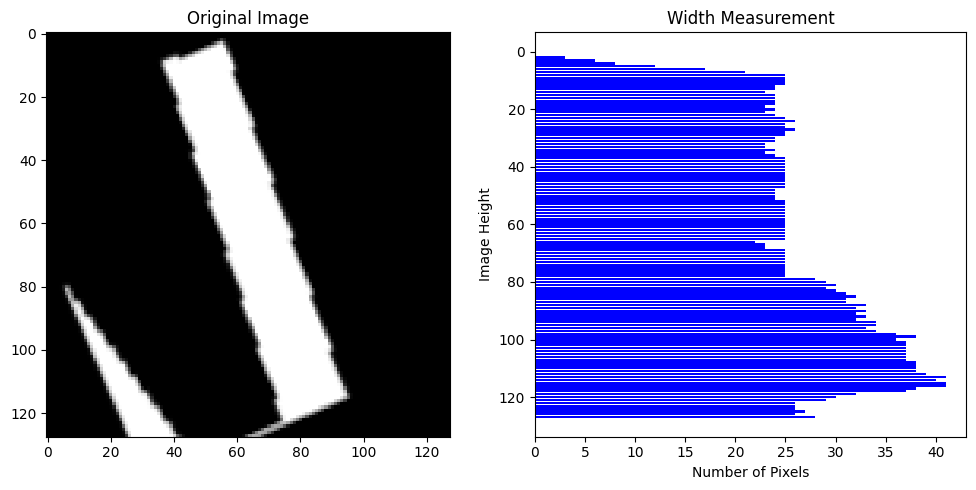

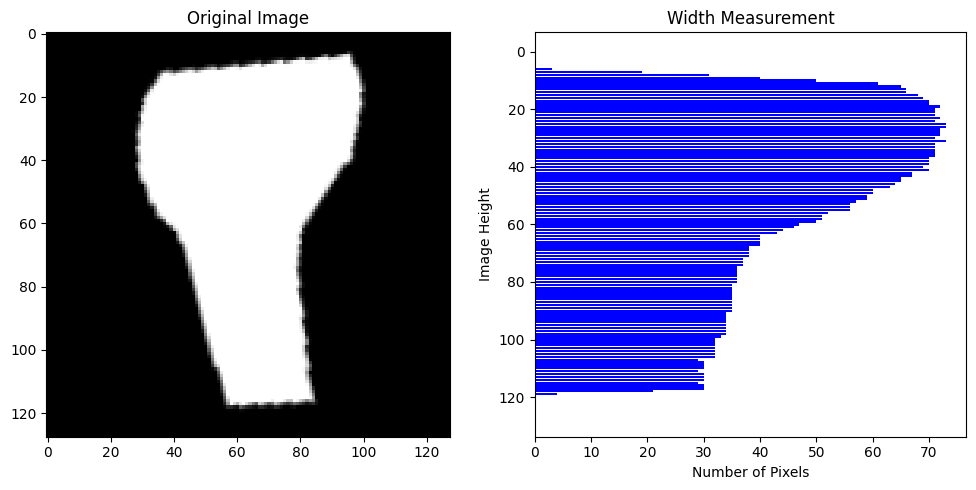

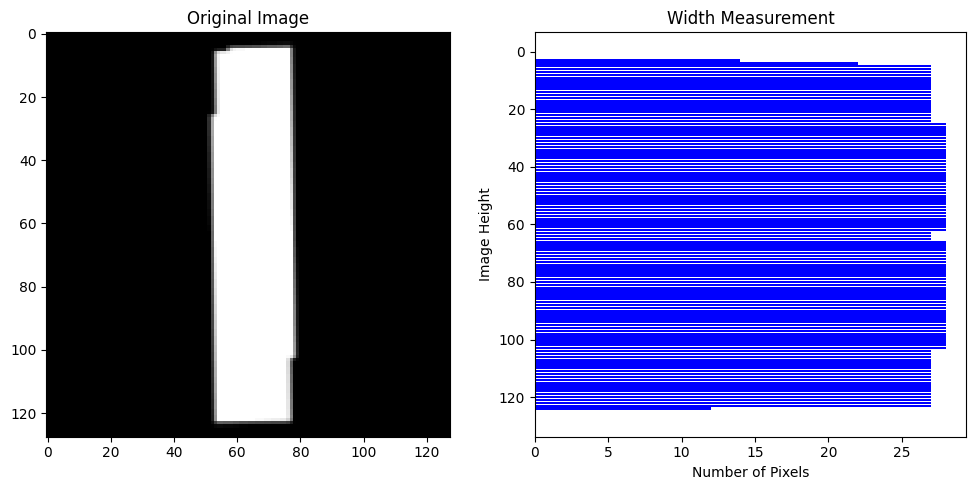

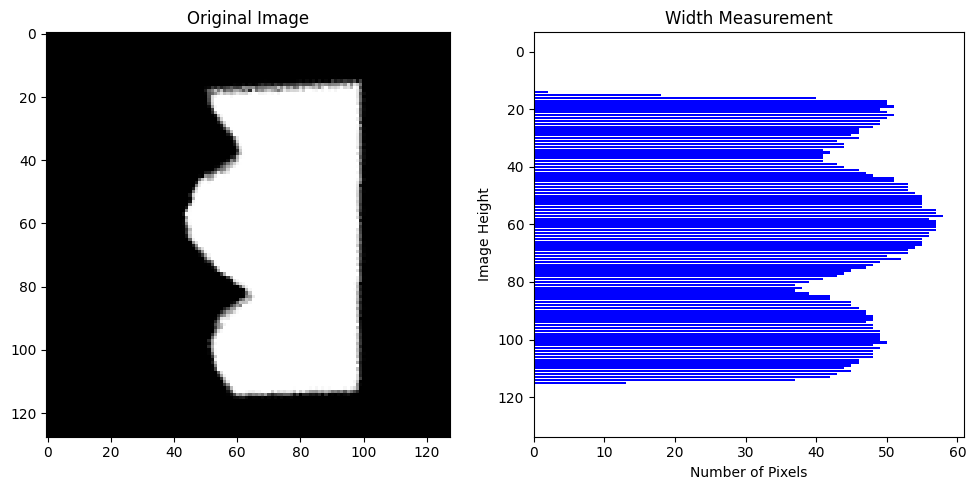

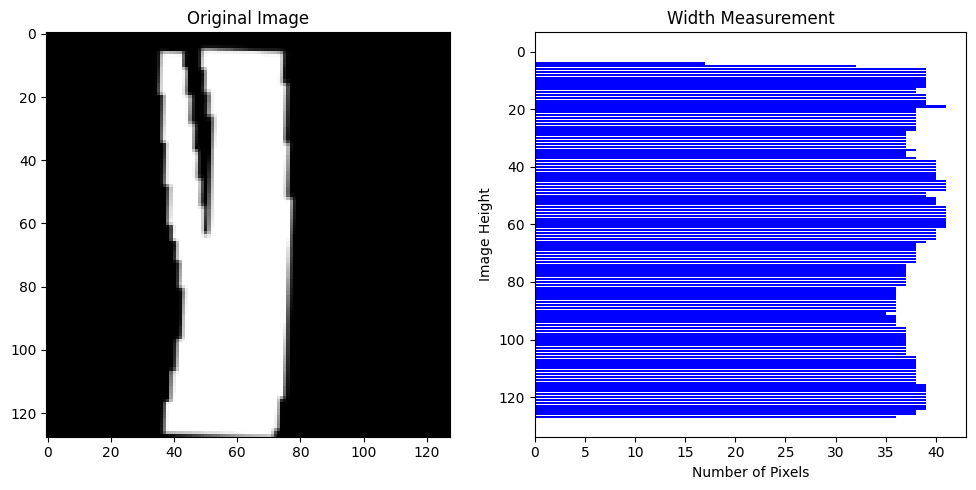

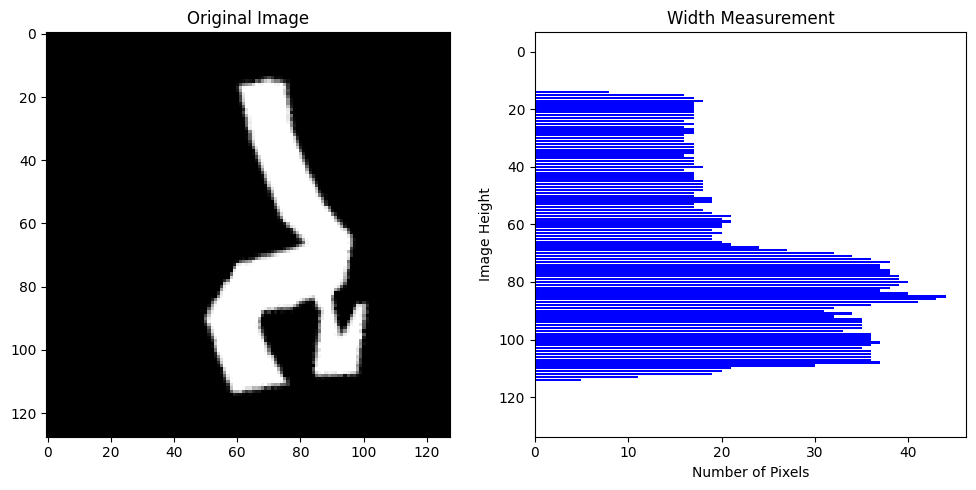

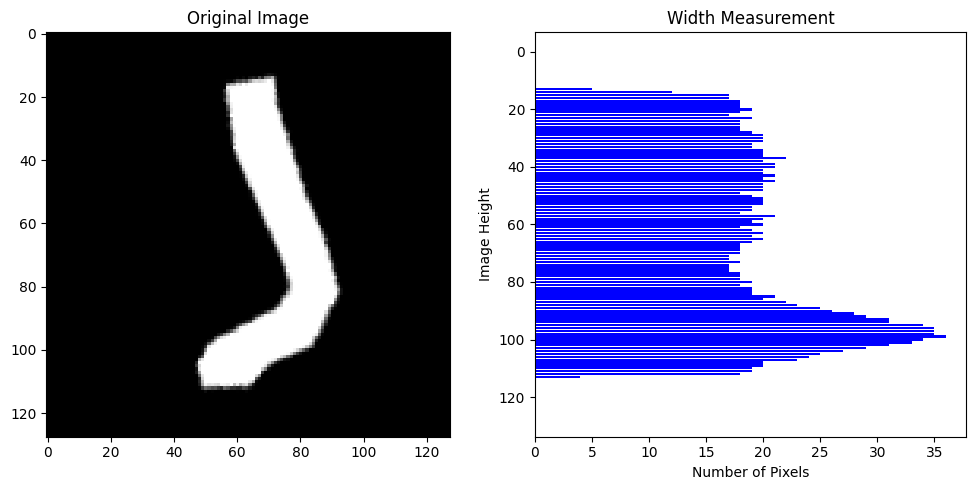

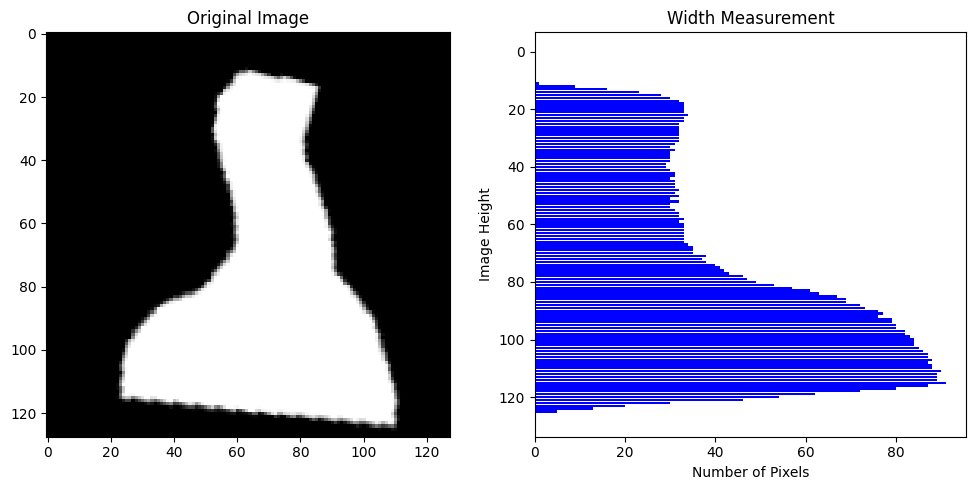

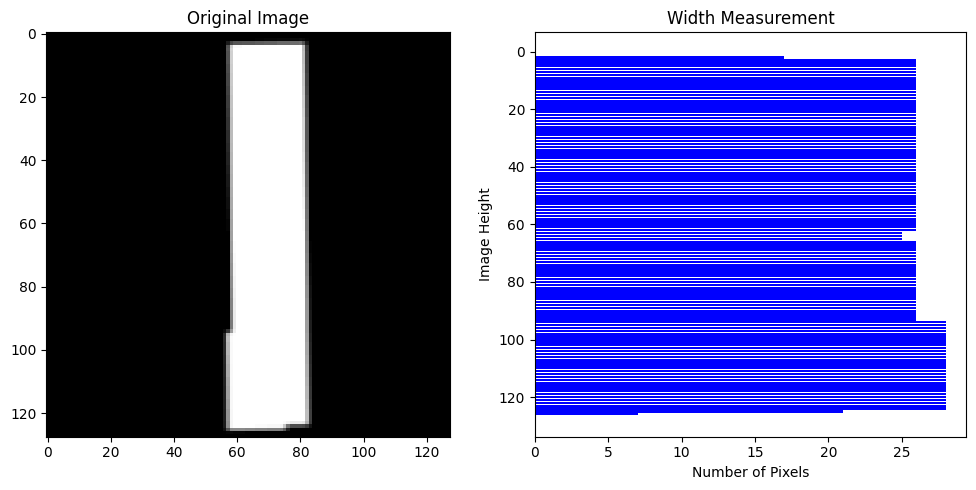

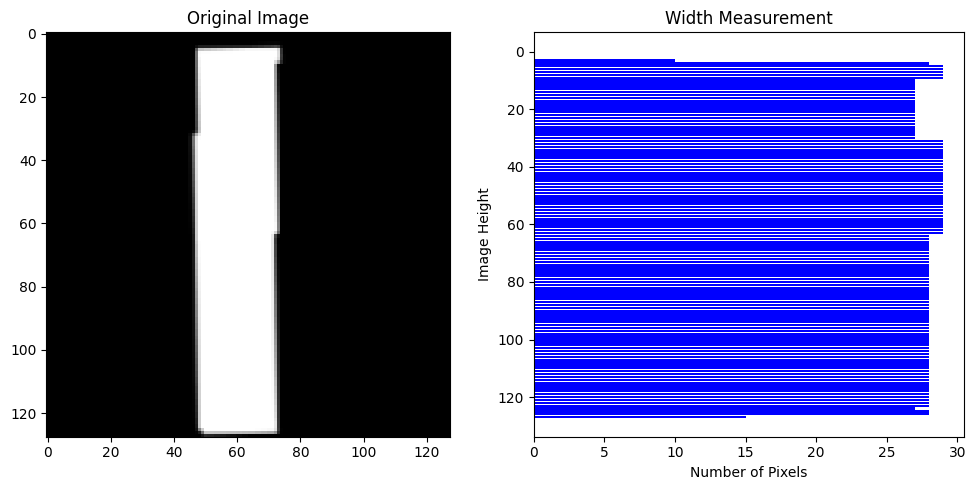

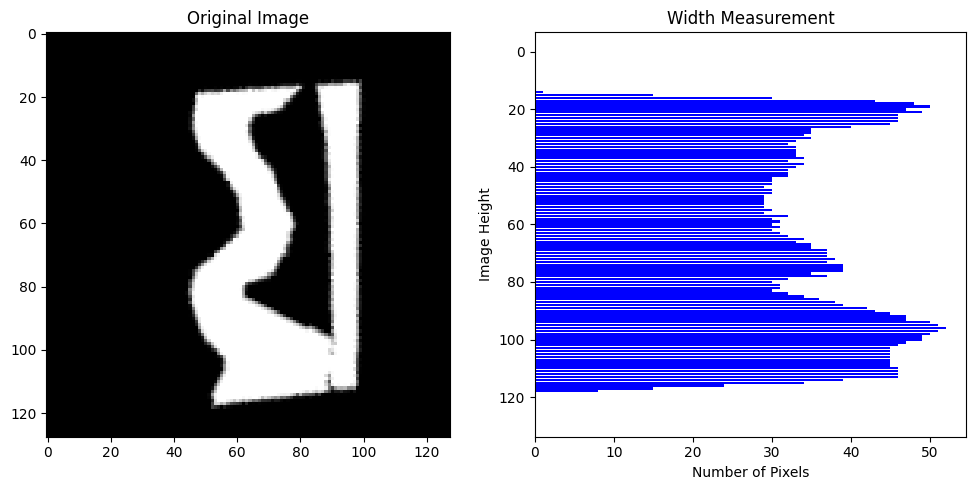

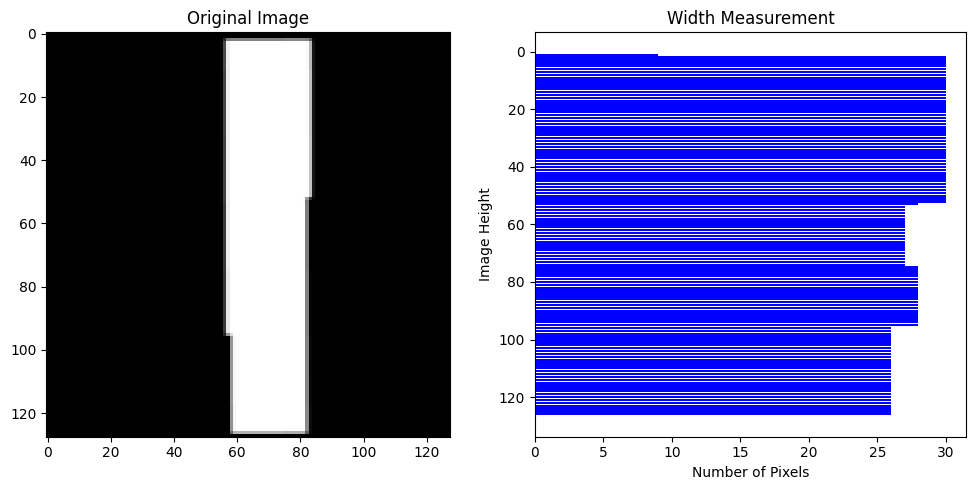

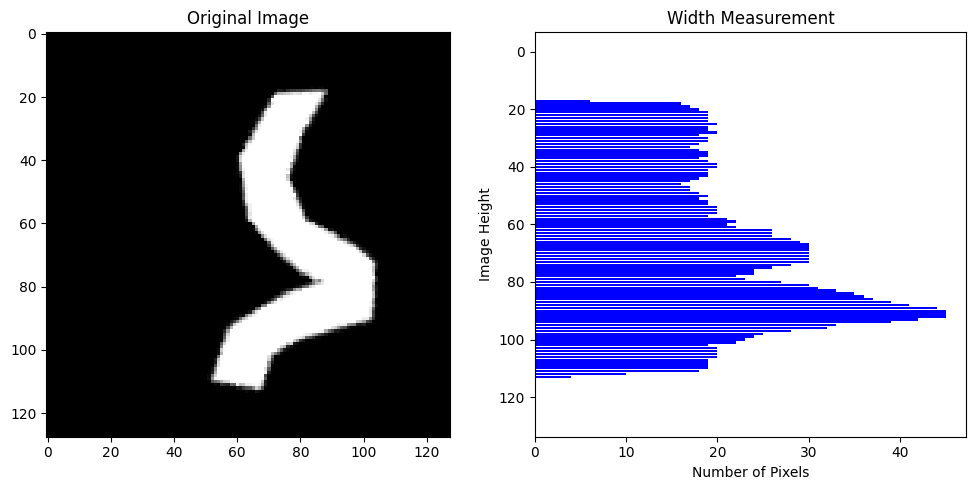

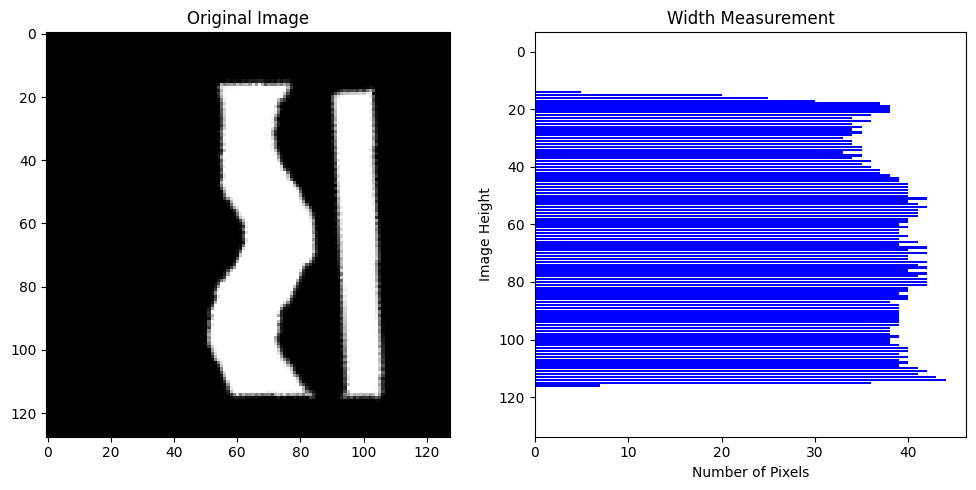

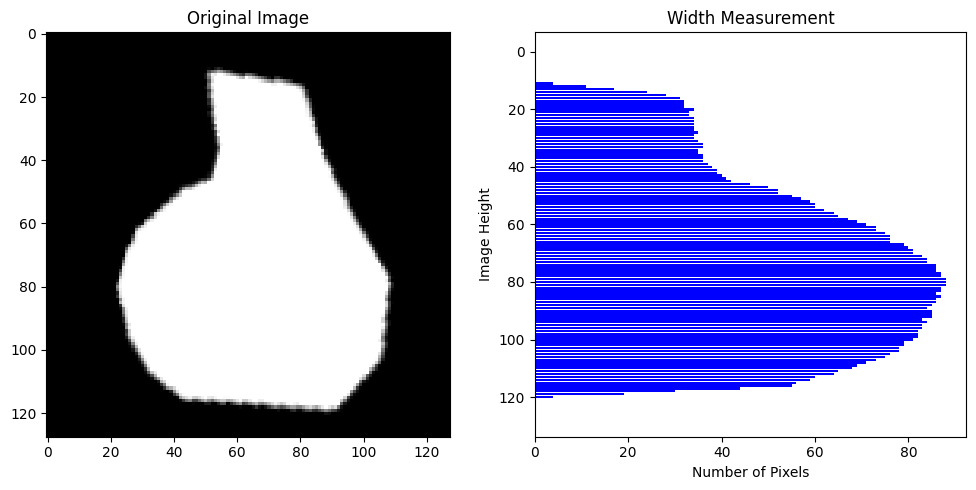

In [28]:
# Save rotated image and histogram
file_list = glob.glob(os.path.join('target', '*.tif'))
file_time = []
for i in range(len(file_list)):
    # Load the image in grayscale mode
    image = cv2.imread(file_list[i], cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))

    # Calculate the rotation angle of the image
    angle = get_rotation_angle(image)

    # Rotate the image by the calculated angle plus 90 degrees
    rotated_image = rotate_image(image, angle+90)
    # Calculate the sums along the x and y axis
    x_sum = np.count_nonzero(rotated_image, axis=0)
    y_sum = np.count_nonzero(rotated_image, axis=1)

    # Create subplots
    # fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show the original image
    axs[0].imshow(rotated_image, cmap='gray')
    axs[0].set_title('Original Image')

    # # Plot x-axis histogram
    # axs[1].bar(range(len(x_sum)), x_sum, color='blue')
    # axs[1].set_title('X-axis histogram')
    # axs[1].set_xlabel('Image Width')
    # axs[1].set_ylabel('Image Height')
    # axs[1].set_yticks(range(0, 129, 20))

    # # Plot y-axis histogram, but invert the y-axis to match the image orientation
    # axs[2].barh(range(len(y_sum)), y_sum, color='blue')
    # axs[2].invert_yaxis()
    # axs[2].set_title('Width Measurement')
    # axs[2].set_xlabel('Number of Pixels')
    # axs[2].set_ylabel('Image Height')

    # Plot y-axis histogram, but invert the y-axis to match the image orientation
    axs[1].barh(range(len(y_sum)), y_sum, color='blue')
    axs[1].invert_yaxis()
    axs[1].set_title('Width Measurement')
    axs[1].set_xlabel('Number of Pixels')
    axs[1].set_ylabel('Image Height')

    # Show the plots
    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join('rotate_hist', file_list[i].split('\\')[-1]))

    # Save the rotated image
    if not os.path.isdir(os.path.join('rotate')):
        os.mkdir(os.path.join('rotate'))
    cv2.imwrite(os.path.join('rotate', file_list[i].split('\\')[-1]), rotated_image)
